In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import xarray as xr

from datetime import datetime, timedelta

import intake
import healpy
import tobac

In [2]:
cat = intake.open_catalog("https://data.nextgems-h2020.eu/catalog.yaml")

In [3]:
cat

data_nextgems-h2020_eu:
  args:
    path: https://data.nextgems-h2020.eu/catalog.yaml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [4]:
cat.ICON

ICON:
  args:
    path: https://data.nextgems-h2020.eu/ICON/main.yaml
  description: ICON model output
  driver: intake.catalog.local.YAMLFileCatalog
  metadata:
    catalog_dir: https://data.nextgems-h2020.eu


In [5]:
cat.ICON.ngc4008

ngc4008:
  args:
    chunks: null
    consolidated: true
    urlpath: /work/bm1235/k202181/ngc4008/ngc4008_P1D_0.zarr
  description: ''
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: https://data.nextgems-h2020.eu/ICON
    experiment_id: nextgems_prefinal
    project: nextGEMS
    simulation_id: ngc4008
    source_id: ICON-ESM


In [6]:
cat.ICON.ngc4008.describe()

{'name': 'ngc4008',
 'container': 'xarray',
 'plugin': ['zarr'],
 'driver': ['zarr'],
 'description': '',
 'direct_access': 'forbid',
 'user_parameters': [{'name': 'time',
   'description': 'time resolution of the dataset',
   'type': 'str',
   'allowed': ['PT15M', 'PT3H', 'P1D'],
   'default': 'P1D'},
  {'name': 'zoom',
   'description': 'zoom resolution of the dataset',
   'type': 'int',
   'allowed': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
   'default': 0}],
 'metadata': {'project': 'nextGEMS',
  'experiment_id': 'nextgems_prefinal',
  'source_id': 'ICON-ESM',
  'simulation_id': 'ngc4008'},
 'args': {'chunks': None,
  'consolidated': True,
  'urlpath': '/work/bm1235/k202181/ngc4008/ngc4008_{{ time }}_{{ zoom }}.zarr'}}

In [7]:
import pandas as pd

pd.DataFrame(cat.ICON.ngc4008.describe()["user_parameters"])

,name,description,type,allowed,default
0,time,time resolution of the dataset,str,"[PT15M, PT3H, P1D]",P1D
1,zoom,zoom resolution of the dataset,int,"[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]",0


In [8]:
cat.ICON.ngc4008()

ngc4008:
  args:
    chunks: null
    consolidated: true
    urlpath: /work/bm1235/k202181/ngc4008/ngc4008_P1D_0.zarr
  description: ''
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: https://data.nextgems-h2020.eu/ICON
    experiment_id: nextgems_prefinal
    project: nextGEMS
    simulation_id: ngc4008
    source_id: ICON-ESM


In [9]:
dataset = cat.ICON.ngc4008(time="PT15M", zoom=9).to_dask()
# dataset = cat.ICON.ngc4008(zoom=8).to_dask()
display(dataset)

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 43TB
Dimensions:  (crs: 1, time: 569760, cell: 3145728)
Coordinates:
  * crs      (crs) float32 4B nan
  * time     (time) datetime64[ns] 5MB 2020-01-01T00:15:00 ... 2036-04-01
Dimensions without coordinates: cell
Data variables:
    pr       (time, cell) float32 7TB ...
    qv2m     (time, cell) float32 7TB ...
    rlut     (time, cell) float32 7TB ...
    rsds     (time, cell) float32 7TB ...
    sfcwind  (time, cell) float32 7TB ...
    tas      (time, cell) float32 7TB ...

In [10]:
dataset.time.max()

<xarray.DataArray 'time' ()> Size: 8B
array('2036-04-01T00:00:00.000000000', dtype='datetime64[ns]')

In [11]:
cat.ICON.ngc4008(time="PT3H", zoom=9).to_dask()

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 460TB
Dimensions:                              (time: 47480, depth_half: 73,
                                          cell: 3145728, crs: 1,
                                          depth_full: 72, level_full: 90,
                                          soil_depth_water_level: 5,
                                          soil_depth_energy_level: 5,
                                          level_half: 91)
Coordinates:
  * crs                                  (crs) float32 4B nan
  * depth_full                           (depth_full) float32 288B 1.0 ... 5....
  * depth_half                           (depth_half) float32 292B 0.0 ... 5....
  * level_full                           (level_full) int32 360B 1 2 3 ... 89 90
  * soil_depth_energy_level              (soil_depth_energy_level) float32 20B ...
  * soil_depth_water_level               (soil_depth_water_level) float32 20B ...
  * time                                 (time) datetime64[ns] 380kB 2020-01-...
    zg                                   (level_full, cell) float32 1GB ...
Dimensions without coordinates: cell, level_half
Data variables: (12/85)
    A_tracer_v_to                        (time, depth_half, cell) float32 44TB ...
    Qbot                                 (time, cell) float32 597GB ...
    Qtop                                 (time, cell) float32 597GB ...
    Wind_Speed_10m                       (time, cell) float32 597GB ...
    atmos_fluxes_FrshFlux_Evaporation    (time, cell) float32 597GB ...
    atmos_fluxes_FrshFlux_Precipitation  (time, cell) float32 597GB ...
    ...                                   ...
    v_vint                               (time, cell) float32 597GB ...
    va                                   (time, level_full, cell) float32 54TB ...
    vas                                  (time, cell) float32 597GB ...
    w                                    (time, depth_half, cell) float32 44TB ...
    zghalf                               (level_half, cell) float32 1GB ...
    zos                                  (time, cell) float32 597GB ...

In [12]:
cat.ICON.ngc4008(time="P1D", zoom=9).to_dask()

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 125TB
Dimensions:                              (time: 5935, depth_half: 73,
                                          cell: 3145728, level_full: 90,
                                          crs: 1, depth_full: 72,
                                          soil_depth_water_level: 5,
                                          level_half: 91,
                                          soil_depth_energy_level: 5)
Coordinates:
  * crs                                  (crs) float32 4B nan
  * depth_full                           (depth_full) float32 288B 1.0 ... 5....
  * depth_half                           (depth_half) float32 292B 0.0 ... 5....
  * level_full                           (level_full) int32 360B 1 2 3 ... 89 90
  * level_half                           (level_half) int32 364B 1 2 3 ... 90 91
  * soil_depth_energy_level              (soil_depth_energy_level) float32 20B ...
  * soil_depth_water_level               (soil_depth_water_level) float32 20B ...
  * time                                 (time) datetime64[ns] 47kB 2020-01-0...
Dimensions without coordinates: cell
Data variables: (12/103)
    A_tracer_v_to                        (time, depth_half, cell) float32 5TB ...
    FrshFlux_IceSalt                     (time, cell) float32 75GB ...
    FrshFlux_TotalIce                    (time, cell) float32 75GB ...
    Qbot                                 (time, cell) float32 75GB ...
    Qtop                                 (time, cell) float32 75GB ...
    Wind_Speed_10m                       (time, cell) float32 75GB ...
    ...                                   ...
    vas                                  (time, cell) float32 75GB ...
    w                                    (time, depth_half, cell) float32 5TB ...
    wa_phy                               (time, level_half, cell) float32 7TB ...
    zg                                   (level_full, cell) float32 1GB ...
    zghalf                               (level_half, cell) float32 1GB ...
    zos                                  (time, cell) float32 75GB ...

In [13]:
dataset.crs

<xarray.DataArray 'crs' (crs: 1)> Size: 4B
array([nan], dtype=float32)
Coordinates:
  * crs      (crs) float32 4B nan
Attributes:
    grid_mapping_name:  healpix
    healpix_nside:      512
    healpix_order:      nest

In [14]:
def get_nest(ds):
    return ds.crs.healpix_order == "nest"


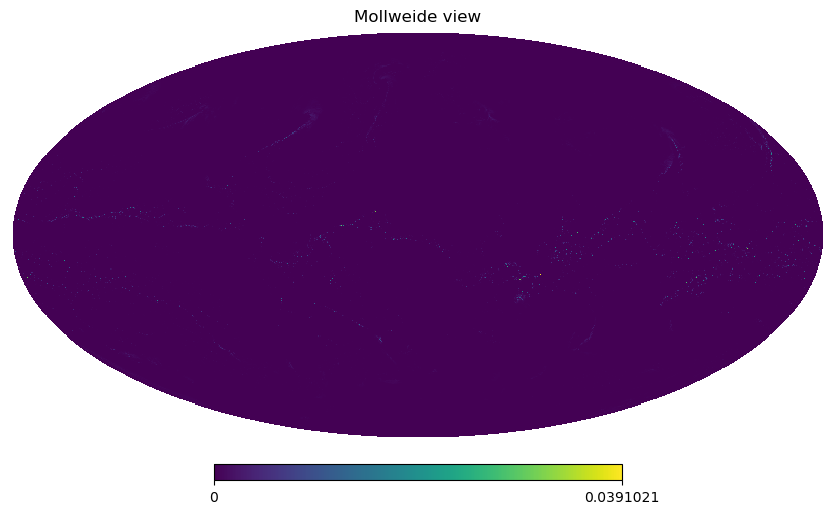

In [15]:
healpy.mollview(dataset.pr.isel(time=1000), flip="geo", nest=get_nest(dataset))

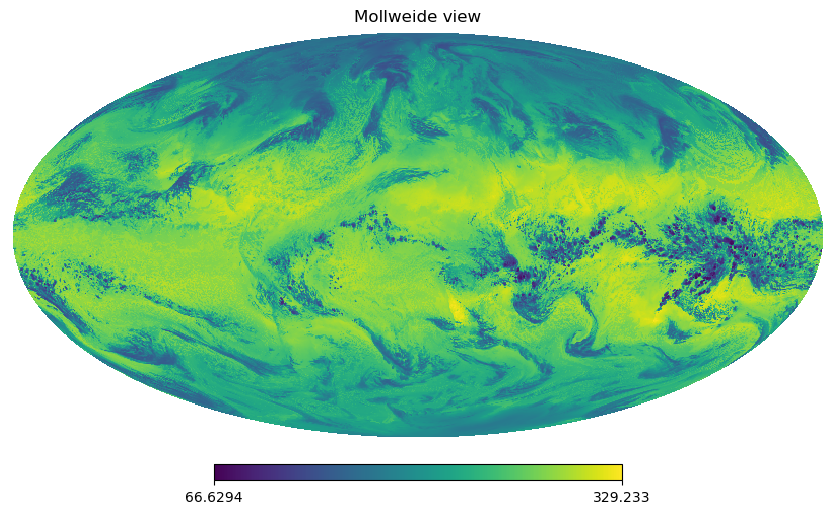

In [16]:
healpy.mollview(dataset.rlut.isel(time=1000), flip="geo", nest=get_nest(dataset))

In [17]:
dataset.crs.healpix_nside

512

In [18]:
lon = xr.DataArray(np.arange(0.05, 360, 0.1), dims=("lon",), name="lon", attrs=dict(units="degrees", standard_name="longitude"))
lat = xr.DataArray(np.arange(89.95, -90, -0.1), dims=("lat",), name="lat", attrs=dict(units="degrees", standard_name="latitude"))

pix = xr.DataArray(
    healpy.ang2pix(dataset.crs.healpix_nside, *np.meshgrid(lon, lat), nest=True, lonlat=True),
    coords=(lat, lon),
)


In [19]:
pix

<xarray.DataArray (lat: 1800, lon: 3600)> Size: 52MB
array([[ 262143,  262143,  262143, ..., 1048575, 1048575, 1048575],
       [ 262142,  262142,  262142, ..., 1048573, 1048573, 1048573],
       [ 262139,  262139,  262139, ..., 1048567, 1048567, 1048567],
       ...,
       [2097160, 2097160, 2097160, ..., 2883588, 2883588, 2883588],
       [2097154, 2097154, 2097154, ..., 2883585, 2883585, 2883585],
       [2097152, 2097152, 2097152, ..., 2883584, 2883584, 2883584]])
Coordinates:
  * lat      (lat) float64 14kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float64 29kB 0.05 0.15 0.25 0.35 ... 359.7 359.8 359.9 360.0

In [22]:
dataset.rlut.isel(time=1000)

<xarray.DataArray 'rlut' (cell: 3145728)> Size: 13MB
[3145728 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B 2020-01-11T10:15:00
Dimensions without coordinates: cell
Attributes:
    cell_methods:   time: mean cell: mean
    component:      atmo
    grid_mapping:   crs
    long_name:      toa outgoing longwave radiation
    standard_name:  toa_outgoing_longwave_flux
    units:          W m-2
    vgrid:          toa

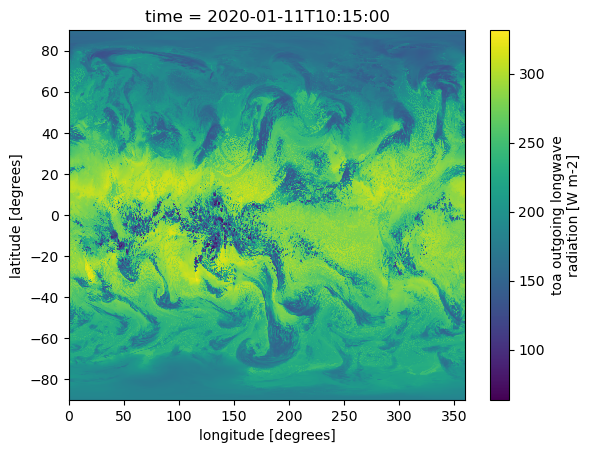

In [21]:
dataset.rlut.isel(time=1000).isel(cell=pix).plot()